## TP 4 : " Reaction - Diffusion Model ".

---
Binôme : Khaled Ibrahim & Servranckx Christophe.

---


Pour ce 4ème travail personnel, nous allons nous intéresser au modèle Gray-scott et à son système d'équations.


Le modèle Gray-Scott, comme nous l'avons vu dans l'introduction de ce TP, représente la réaction et la diffusion de deux espèces chimique générique que l'on notera U et V. 


Dès lors, l'objectif sera ici, sous certaine condition initiales (CI) et au bords (CB), de simuler l'interaction des deux espèces chimique qui réagissent entre-elle et se diffusent.


Pour se faire, nous aurons à discrétiser le système d'équation différentiel partielle (EDP) selon une discrétisation *forward* pour le temps et *centrale* pour l'espace et à implémenter notre système à deux dimensions comme nous l'avons fait tout au long de ce 4ème module.

---

##### 1. Rappel et développement théorique.
---

Comme nous l'avons vu, le modèle de Gray-Scott suit quelque règles qui permettent alors d'en déduire les EDP pour les concentrations $u(x,y,t)$ et $v(x,y,t)$ pour les deux espèces chimiques:


\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla ^2 u - uv^2 + F(1-u)\\
\frac{\partial v}{\partial t} &= D_v \nabla ^2 v + uv^2 - (F + k)v
\end{align}

avec      

* Les termes représentant la variation temporelle de la concentration de chaque espèce:  $\frac{\partial u}{\partial t} $ et $\frac{\partial v}{\partial t}$ 

* Les termes de diffusion de chaque concentration avec $Du$ et $Dv$ le taux respectif de diffusion et $\nabla^2$ le laplacien en coordonnée cartésienne à deux dimmension.

* Les termes liée à la probabilité de trouver une pespèce U ou V en fonction de sa concentration. Pour une molécule de U, la probabilité de la trouver est proportionnel à $u$ tandis que pour une molécule de V, cette probabilité est proportionnel à $v^2$ 

* Les termes d'alimentation et de destruction des deux espèces chimiques. 

Notons que les valeurs de $F$ et $k$ sont choisies comme paramètres, le résultat de notre analyse découle du choix de ces derniers.
Maintenant que nous avons les équations, nous pouvons passer à la discrétisations de ces dernières.

---

##### 2. Discrétisation des équations de réaction - diffusion et des conditions au bord.
---


\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla ^2 u - uv^2 + F(1-u)\\
\frac{\partial v}{\partial t} &= D_v \nabla ^2 v + uv^2 - (F + k)v
\end{align}

Comme indiqué, nous discrétisons les équations de réaction-diffusion en utilisant les discrétisations *forward-time* et *centered-space*. Procédons tout d'abord à la discrétisation de l'équation (1).


---

#### 2.1 Discrétisation de l'équation (1).
---

Commençons par la discrétisation des dérivées temporelle et spatiale.

* Forward-time : 

$$ \frac{\partial u}{\partial t} \approx \frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} $$

* centered-space : 

$$ \nabla ^2 u \approx \frac{u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}}{\Delta x^2} + \frac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}}{\Delta y^2} $$

$\hspace{0.8cm}$ ou en supposant que $ \Delta x = \Delta y = \delta$. 

$$→  \nabla ^2 u \approx \frac{1}{\delta ^2} \left[ \left( u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j} \right) + \left( u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1} \right) \right]$$

Notre équation discrétisée est ainsi donnée par :

$$\frac{u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} = \frac{D_u}{\delta ^2} \left[ \left( u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j} \right) + \left( u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1} \right) \right] - u^{n}_{i,j} \left( v^n_{i,j} \right) ^2 + F \left(1-u^{n}_{i,j} \right) $$

Où la seule inconnue est $u^{n+1}_{i,j}$. Dès lors, en isolant cette inconnue dans le membre de gauche:

$$
\begin{array}{}
u^{n+1}_{i,j}= u^{n}_{i,j} + \frac{D_u \Delta t}{\delta ^2} \left[ \left( u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j} \right) + \left( u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1} \right) \right] - \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^n_{i,j} \right) ^2 + \Delta{t} \mbox{ } F \left(1-u^{n}_{i,j} \right)
\end{array}
$$

et en réarrangant quelque peu cette équation, nous obtenons :

$$
\begin{array}{}
\hspace{-3.0cm} u^{n+1}_{i,j} = \frac{D_u \Delta t}{\delta ^2} \left( u^{n}_{i+1,j} + u^{n}_{i-1,j} + u^{n}_{i,j+1} + u^{n}_{i,j-1} \right) + \left[ 1- \frac{4 D_u \Delta t}{\delta ^2} - \Delta{t} \mbox{ } \left( v^n_{i,j} \right) ^2 - \Delta{t} \mbox{ } F \right] u^{n}_{i,j} + \Delta{t} \mbox{ } F 
\end{array}
$$
 
Finalement, en posant $c_1 = \frac{D_u \Delta t}{\delta ^2}$, il en découle l'équation suivante:

$$
\begin{equation}
\hspace{-2.0cm} u^{n+1}_{i,j} = \Delta{t} \mbox{ } F + \left[ 1- 4 c_1 - \Delta{t} \mbox{ } \left( v^n_{i,j} \right) ^2 - \Delta{t} \mbox{ } F \right] u^{n}_{i,j} \hspace{0.9cm} + c_1 \left( u^{n}_{i+1,j} + u^{n}_{i-1,j} + u^{n}_{i,j+1} + u^{n}_{i,j-1} \right)
\end{equation}
$$

---

#### 2.2 Discrétisation de l'équation (2).
---

Nous procédons de manière identique à ce que nous venons d'éffectuer pour l'équation (1), e.g., nous commençons par discrétiser les dérivées temporelle et spatiale,

* Forward-time : 

$$ \frac{\partial v}{\partial t} \approx \frac{v^{n+1}_{i,j} - v^{n}_{i,j}}{\Delta t} $$

* centered-space : 

$$ \nabla ^2 v \approx \frac{v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j}}{\Delta x^2} + \frac{v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1}}{\Delta y^2} $$

$\hspace{0.8cm}$ Or, $ \Delta x = \Delta y = \delta$.

$$→  \nabla ^2 v \approx \frac{1}{\delta ^2} \left[ \left( v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j} \right) + \left( v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1} \right) \right]$$

qui nous donne,

$$ \frac{v^{n+1}_{i,j} - v^{n}_{i,j}}{\Delta t} = \frac{D_v}{\delta ^2} \left[ \left( v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j} \right) + \left( v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1} \right) \right] + u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 - \left(F+k \right) v^{n}_{i,j} $$

En isolant la seule inconnue $v^{n+1}_{i,j}$, nous avons alors:

$$ 
\begin{array}{}
v^{n+1}_{i,j} = v^{n}_{i,j} + \frac{D_v \Delta t}{\delta ^2} \left[ \left( v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j} \right) + \left( v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1} \right) \right] + \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 - \Delta{t} \left(F+k \right) v^{n}_{i,j} 
\end{array}
$$

qui devient après un réarrangement et en posant $c_2 = \frac{D_v \Delta t}{\delta ^2}$ :

$$
\begin{equation}
\hspace{-3.0cm} v^{n+1}_{i,j} = + \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 + \left[ 1- 4 c_2 - \Delta{t} \mbox{ } \left( F+k \right)  \right] v^{n}_{i,j} \hspace{3.5cm} + c_2 \left( v^{n}_{i+1,j} + v^{n}_{i-1,j} + v^{n}_{i,j+1} + v^{n}_{i,j-1} \right) 
\end{equation}
$$

Cette deuxième équation étant discrétisée, il ne nous reste plus qu'à discrétiser nos conditions aux bords.

---

#### 2.3 Conditions aux bords.
---


Pour notre problème, les 4 bords du domaines sont soumis à la même CB à savoir, une CB de Neumann nulle. Or comme nous l'avons vu au fil des leçons de ce module, nous  pouvons approximer les CB de Neumann par des différences finies. Nous avons donc:

$$
\left\{
\begin{array}{}
\frac{\partial u}{\partial x} = \frac{\partial u}{\partial y} = q\\
\frac{\partial v}{\partial x} = \frac{\partial v}{\partial y} = q
\end{array}
\right.
$$

où $q=0$ (ce qui correspond à une paroie qui isole notre système de son environnement). 

Ainsi, à chaque pas de temps nous avons (en se souvenant que $ \Delta x = \Delta y = \delta$):

* Pour u :

$$
\left\{
\begin{array}{}
\frac{\partial u}{\partial x} \approx \frac{u_{end,j} - u_{end-1,j}}{\Delta x} = q \mbox{ } → \mbox{ } u_{end,j} = u_{end-1,j} + q \delta\\
\frac{\partial u}{\partial x} \approx \frac{u_{i,end} - u_{i,end-1}}{\Delta y} = q \mbox{ } → \mbox{ } u_{i,end} = u_{i,end-1} + q \delta 
\end{array}
\right.
$$

* Pour v :

$$
\left\{
\begin{array}{}
\frac{\partial v}{\partial x} \approx \frac{v_{end,j} - v_{end-1,j}}{\Delta x} = q \mbox{ } → \mbox{ } v_{end,j} = v_{end-1,j} + q \delta\\
\frac{\partial v}{\partial x} \approx \frac{v_{i,end} - v_{i,end-1}}{\Delta y} = q \mbox{ } → \mbox{ } v_{i,end} = v_{i,end-1} + q \delta 
\end{array}
\right.
$$

---

#### 2.4 Récapitulatif.
---

Nous avons finalement réussi à discrétiser nos équations de réaction-diffusion ainsi que nos conditions aux bords que l'on a réunit ci-dessous:

* Equations de réaction-diffusion :

$$
\left\{
\begin{array}{}
u^{n+1}_{i,j} = \Delta{t} \mbox{ } F + \left[ 1- 4 c_1 - \Delta{t} \mbox{ } \left( v^n_{i,j} \right) ^2 - \Delta{t} \mbox{ } F \right] u^{n}_{i,j} \hspace{3.0cm} + c_1 \left( u^{n}_{i+1,j} + u^{n}_{i-1,j} + u^{n}_{i,j+1} + u^{n}_{i,j-1} \right)  \\
v^{n+1}_{i,j} = - \Delta{t} \mbox{ } u^{n}_{i,j} \left( v^{n}_{i,j} \right) ^2 + \left[ 1- 4 c_2 - \Delta{t} \mbox{ } \left( F+k \right)  \right] v^{n}_{i,j} \hspace{3.0cm} + c_2 \left( v^{n}_{i+1,j} + v^{n}_{i-1,j} + v^{n}_{i,j+1} + v^{n}_{i,j-1} \right)
\end{array}
\right.
$$

* Conditions aux bords de Neumann :

$$
\left\{
\begin{array}{}
u_{end,j} = u_{end-1,j} + q \delta\\
u_{i,end} = u_{i,end-1} + q \delta\\
v_{end,j} = v_{end-1,j} + q \delta\\
v_{i,end} = v_{i,end-1} + q \delta 
\end{array}
\right.
$$

Passons maintenant à la résolution du problème.

---

##### 3. Résolution du problème.
---

In [1]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

In [2]:
n  = 192
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 
dh = 5/(n-1)
T  = 8000
dt = .9 * dh**2 / (4*max(Du,Dv))
nt = int(T/dt)
L  = 5

c1 = Du*dt/(dh**2)
c2 = Dv*dt/(dh**2)

In [3]:
uvinitial = numpy.load('./data/uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

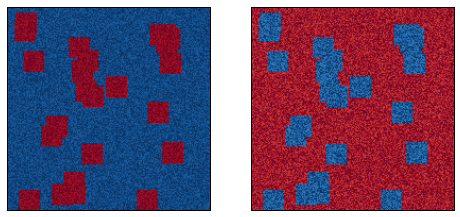

In [4]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [5]:
def ftcs(U, V, nt, c1, c2, F, k, dt):
    
    for t in range(nt):
        Un = U.copy()
        Vn = V.copy()
        
        U[1:-1,1:-1] = ((1-4*c1-dt*(Vn[1:-1,1:-1])**2-dt*F)* Un[1:-1,1:-1])\
             + c1*(Un[1:-1,2:] + Un[1:-1,:-2] + Un[2:,1:-1] + Un[:-2,1:-1])\
             + (dt*F) 
       
        V[1:-1,1:-1] = ((1-4*c2-dt*(F+k))* Vn[1:-1,1:-1])\
             + (dt*Un[1:-1,1:-1]*((Vn[1:-1,1:-1])**2))\
             + c2*(Vn[1:-1,2:] + Vn[1:-1,:-2] + Vn[2:,1:-1] + Vn[:-2,1:-1])
        
        # On impose des conditions aux bords de Neumann
    
        # Bord supérieur
        U[-1,:] = U[-2,:]
        V[-1,:] = V[-2,:]
        
        # Bord inférieur
        U[0,:]  = U[1,:]
        V[0,:]  = V[1,:]
        
        # Bord droit
        U[:,-1] = U[:,-2]
        V[:,-1] = V[:,-2]
        
        # Bord gauche
        U[:,0]  = U[:,1]
        V[:,0]  = V[:,1]

    return numpy.array([U,V])

In [6]:
s = ftcs(U, V, nt, c1, c2, F, k, dt)

In [7]:
u = s[0]
v = s[1]

In [8]:
print(u[100,::40])

[ 0.92469521  0.85013834  0.66815621  0.90196481  0.9039502 ]


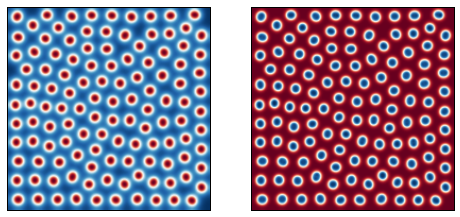

In [9]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

Animation

In [10]:
from matplotlib import animation
from IPython.display import HTML

In [11]:
s_anim = ftcs(U, V, nt, c1, c2, F, k, dt)

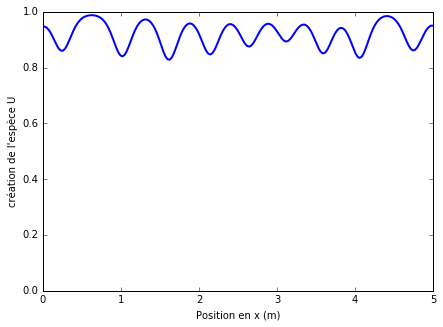

In [12]:
fig = pyplot.figure(figsize=(7,5));
ax = pyplot.axes(xlim=(0,5),ylim=(0,1),xlabel=('Position en x (m)'),ylabel=("création de l'espèce U"));
line, = ax.plot([],[],'b-', lw=2);

def animate(data):
    x = numpy.linspace(0,L,n)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=s_anim[0], interval=50)

In [13]:
HTML(anim.to_html5_video())

In [67]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

In [81]:
def ftcs(U, V, nt, c1, c2, F, k, dt):
    
    for t in range(nt):
        Un = U.copy()
        Vn = V.copy()
        
        U[1:-1,1:-1] = ((1-4*c1-dt*(Vn[1:-1,1:-1])**2-dt*F)* Un[1:-1,1:-1])\
             + c1*(Un[1:-1,2:] + Un[1:-1,:-2] + Un[2:,1:-1] + Un[:-2,1:-1])\
             + (dt*F) 
       
        V[1:-1,1:-1] = ((1-4*c2-dt*(F+k))* Vn[1:-1,1:-1])\
             + (dt*Un[1:-1,1:-1]*((Vn[1:-1,1:-1])**2))\
             + c2*(Vn[1:-1,2:] + Vn[1:-1,:-2] + Vn[2:,1:-1] + Vn[:-2,1:-1])
        
        # On impose des conditions aux bords de Neumann
    
        # Bord supérieur
        U[-1,:] = U[-2,:]
        V[-1,:] = V[-2,:]
        
        # Bord inférieur
        U[0,:]  = U[1,:]
        V[0,:]  = V[1,:]
        
        # Bord droit
        U[:,-1] = U[:,-2]
        V[:,-1] = V[:,-2]
        
        # Bord gauche
        U[:,0]  = U[:,1]
        V[:,0]  = V[:,1]

    return numpy.array([U,V])

In [83]:
s = ftcs(U, V, nt, c1, c2, F, k, dt)

s1= s[0]

In [84]:
s1.shape

(192, 192)

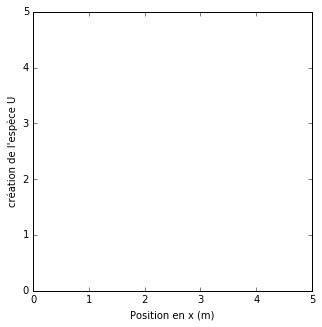

In [85]:
fig = pyplot.figure(figsize=(5,7));
ax = pyplot.axes(xlim=(0,5),ylim=(0,5),xlabel=('Position en x (m)'),ylabel=("création de l'espèce U"));
line, = ax.plot([],[],'b-', lw=2);

ims = []
for i in range(int(nt/100)):
    im = pyplot.imshow(s1, cmap= cm.RdBu, animated=True)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=20, blit=True)

In [86]:
HTML(anim.to_html5_video())

---
###### La cellule ci-dessous charge le style du notebook.

In [20]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())